In [1]:
import os
import pandas as pd
import ast
from pymoo.indicators.hv import Hypervolume
import numpy as np
import matplotlib.pyplot as plt


In [26]:

# Define the root folder path
root_folder = '/Users/carlonue/Documents/Venvs/pathpave_pymoo/log_all_final/gradientMap'
ref_point_gradient_map = (3329.7000000000003, 3059.463)
ref_point_river_map = (3369.3, 4263.996254441)
ref_point_radial_gradient_map = (3483.7000000000003, 2492.8322626350005)
ref_point_sinusoidal_map = (3329.7000000000003, 2459.370938244)

# Initialize an empty list to store all objective values
combined_objective_values = []

# Initialize lists to store HV values per generation across all files
hv_per_generation = []

# Create a Hypervolume indicator instance with the reference point
hv_indicator = Hypervolume(ref_point=ref_point_gradient_map)

# Iterate through all subfolders
for subdir, _, files in os.walk(root_folder):
    if "AGEMOEA" in os.path.basename(subdir):
        for file in files:
            # Check if the file is the CSV we are looking for
            if file == 'optLog.csv':
                file_path = os.path.join(subdir, file)
                
                # Read the first row of the CSV file
                df = pd.read_csv(file_path)
                
                # Initialize a list to store HV values for this specific file
                hv_values = []
                
                # Iterate through each row in the dataframe
                for index, row in df.iterrows():
                    # Access the "objectiveValues" column and convert the string to a list of lists
                    objective_values_str = row[' objectiveValues']
                    objective_values_list = ast.literal_eval(objective_values_str)
                    
                    # Convert the list of lists to a NumPy array
                    objective_values_array = np.array(objective_values_list)
                    
                    # Calculate HV for this generation
                    hv_value = hv_indicator(objective_values_array)
                    hv_values.append(hv_value)
                
                # Append the HV values of this file to the main list
                hv_per_generation.append(hv_values)

# Convert the list of lists into a NumPy array for easier computation
hv_per_generation = np.array(hv_per_generation)

# Calculate the average HV per generation
average_hv_per_generation = np.mean(hv_per_generation, axis=0)

# Calculate the standard deviation of HV per generation
std_hv_per_generation = np.std(hv_per_generation, axis=0)

# Print the results
for i, (avg_hv, std_hv) in enumerate(zip(average_hv_per_generation, std_hv_per_generation)):
    print(f"Generation {i+1}: Average HV = {avg_hv:.4f}, Std Dev = {std_hv:.4f}")


Compiled modules for significant speedup can not be used!
https://pymoo.org/installation.html#installation

To disable this warning:
from pymoo.config import Config
Config.warnings['not_compiled'] = False

Generation 1: Average HV = 7606646.0706, Std Dev = 761710.2325
Generation 2: Average HV = 7939082.1256, Std Dev = 659448.4557
Generation 3: Average HV = 8347920.3623, Std Dev = 544647.7218
Generation 4: Average HV = 8703896.2463, Std Dev = 446977.6172
Generation 5: Average HV = 9006095.2780, Std Dev = 346049.5919
Generation 6: Average HV = 9227371.6152, Std Dev = 306180.0690
Generation 7: Average HV = 9363453.2951, Std Dev = 256232.5104
Generation 8: Average HV = 9451723.7513, Std Dev = 230282.6553
Generation 9: Average HV = 9534303.4435, Std Dev = 204546.0523
Generation 10: Average HV = 9593517.3282, Std Dev = 187216.9619
Generation 11: Average HV = 9634562.6563, Std Dev = 174939.2653
Generation 12: Average HV = 9668895.6824, Std Dev = 168081.3032
Generation 13: Average HV = 969279

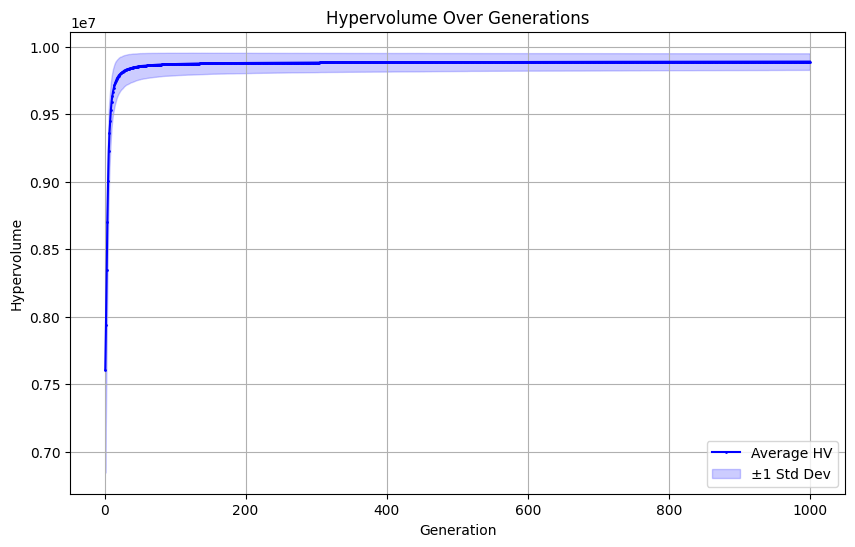

In [28]:

# Plotting
plt.figure(figsize=(10, 6))

# Plot the average HV values as a line
plt.plot(range(1, len(average_hv_per_generation) + 1), average_hv_per_generation, color='blue', marker='o', label='Average HV', markersize=1)

# Plot the standard deviation as a shaded region around the average
plt.fill_between(range(1, len(average_hv_per_generation) + 1),
                 average_hv_per_generation - std_hv_per_generation,
                 average_hv_per_generation + std_hv_per_generation,
                 color='blue', alpha=0.2, label='± Std Dev')

# Add labels and title
plt.xlabel('Generation')
plt.ylabel('Hypervolume')
plt.title('Hypervolume Over Generations')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


<>:108: SyntaxWarning: invalid escape sequence '\p'
<>:108: SyntaxWarning: invalid escape sequence '\p'
/var/folders/mx/mgxw5ty52v78mpzwcxl8r2340000gn/T/ipykernel_29225/4292665875.py:108: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel('Average Hypervolume $\pm$ Standard Deviation', fontsize=30)


Processing AGEMOEA_2...

Compiled modules for significant speedup can not be used!
https://pymoo.org/installation.html#installation

To disable this warning:
from pymoo.config import Config
Config.warnings['not_compiled'] = False

Processing CTAEA_2...
Processing DNSGA2_2...
Processing MOEAD_2...
Processing NSGA2_2...
Processing NSGA3_2...
Processing RNSGA2_2...
Processing SMSEMOA_2...
Processing SPEA2_2...


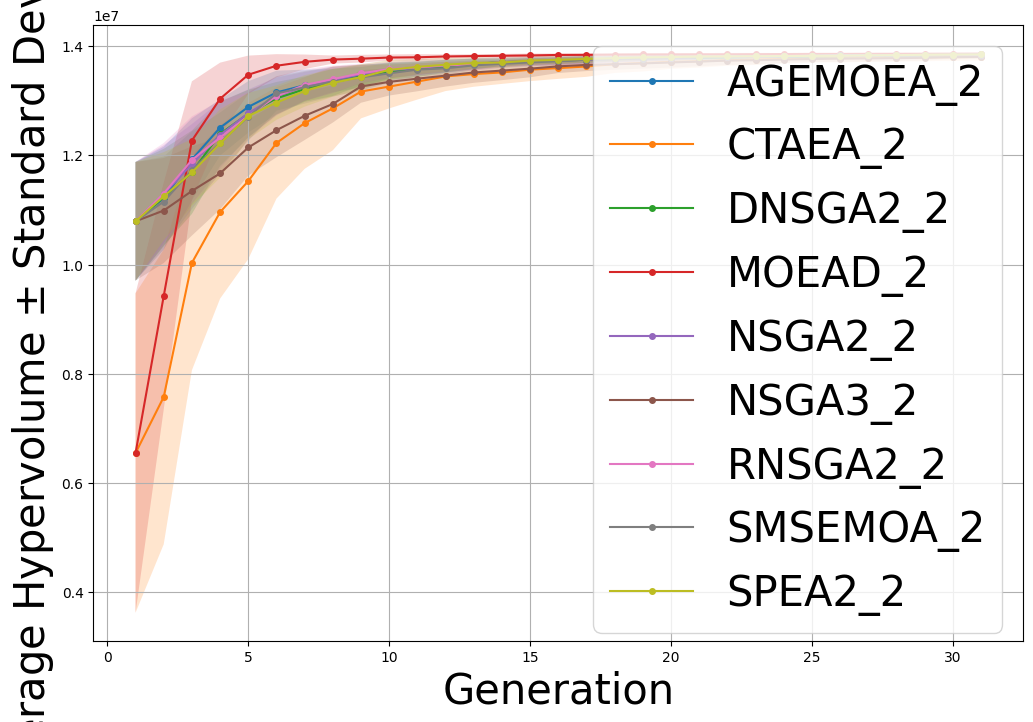

In [1]:
import os
import pandas as pd
import ast
import numpy as np
from pymoo.indicators.hv import Hypervolume
import matplotlib.pyplot as plt

# Define the root folder path
root_folder = '/Users/carlonue/Documents/Venvs/pathpave_pymoo/log_all_final/meanderingRiverMap'

# Reference point for HV calculation
ref_point_gradient_map = (3329.7000000000003, 3059.463)
ref_point_river_map = (3369.3, 4263.996254441)
ref_point_radial_gradient_map = (3483.7000000000003, 2492.8322626350005)
ref_point_sinusoidal_map = (3329.7000000000003, 2459.370938244)

# List of algorithm names with delimiters
algorithmsx = ["_AGEMOEA_0", "_CTAEA_0", "_DNSGA2_0", "_MOEAD_0", "_NSGA2_0", "_NSGA3_0", "_RNSGA2_0", "_SMSEMOA_0", "_SPEA2_0"]
algorithmsx = ["_AGEMOEA_1", "_CTAEA_1", "_DNSGA2_1", "_MOEAD_1", "_NSGA2_1", "_NSGA3_1", "_RNSGA2_1", "_SMSEMOA_1", "_SPEA2_1"]
algorithms = ["_AGEMOEA_2", "_CTAEA_2", "_DNSGA2_2", "_MOEAD_2", "_NSGA2_2", "_NSGA3_2", "_RNSGA2_2", "_SMSEMOA_2", "_SPEA2_2"]
algorithmsx = ["_AGEMOEA_3", "_CTAEA_3", "_DNSGA2_3", "_MOEAD_3", "_NSGA2_3", "_NSGA3_3", "_RNSGA2_3", "_SMSEMOA_3", "_SPEA2_3"]
algorithmsx = ["_AGEMOEA_4", "_CTAEA_4", "_DNSGA2_4", "_MOEAD_4", "_NSGA2_4", "_NSGA3_4", "_RNSGA2_4", "_SMSEMOA_4", "_SPEA2_4"]

# Dictionary to store HV values per generation for each algorithm
hv_dict = {algo: ([], []) for algo in algorithms}  # (average_hv_list, std_hv_list)

# Process each algorithm
for algo in algorithms:
    print(f"Processing {algo.strip('_')}...")
    
    # Initialize lists to store HV values per generation across all files for the current algorithm
    hv_per_generation = []
    
    # Create a Hypervolume indicator instance with the reference point
    hv_indicator = Hypervolume(ref_point=ref_point_river_map)
    
    # Iterate through all subfolders
    for subdir, _, files in os.walk(root_folder):
        # Check if the folder name contains the algorithm name with delimiters
        if any(algo in os.path.basename(subdir) for algo in algorithms):
            if algo.strip('_') in os.path.basename(subdir):  # Exact match check
                for file in files:
                    # Check if the file is the CSV we are looking for
                    if file == 'optLog.csv':
                        file_path = os.path.join(subdir, file)
                        
                        # Process the first 1000 lines of the file
                        try:
                            df = pd.read_csv(file_path, nrows=31)
                        except Exception as e:
                            print(f"Error reading {file_path}: {e}")
                            continue
                        
                        # Initialize a list to store HV values for this specific file
                        hv_values = []
                        
                        # Iterate through each row in the dataframe
                        for index, row in df.iterrows():
                            # Access the "objectiveValues" column and convert the string to a list of lists
                            objective_values_str = row[' objectiveValues']
                            objective_values_list = ast.literal_eval(objective_values_str)
                            
                            # Convert the list of lists to a NumPy array
                            objective_values_array = np.array(objective_values_list)
                            
                            # Calculate HV for this generation
                            hv_value = hv_indicator(objective_values_array)
                            hv_values.append(hv_value)
                        
                        # Check if hv_values has been collected and append to hv_per_generation
                        if hv_values:
                            hv_per_generation.append(hv_values)
    
    # Check for consistency and convert the list of lists into a NumPy array
    if hv_per_generation:
        # Find the maximum length of HV lists
        max_length = max(len(hv) for hv in hv_per_generation)
        
        # Pad the hv_values lists to have the same length
        padded_hv_per_generation = [hv + [np.nan] * (max_length - len(hv)) for hv in hv_per_generation]
        
        # Convert to a NumPy array
        hv_per_generation = np.array(padded_hv_per_generation)
        
        # Calculate the average HV per generation
        average_hv_per_generation = np.nanmean(hv_per_generation, axis=0)
        
        # Calculate the standard deviation of HV per generation
        std_hv_per_generation = np.nanstd(hv_per_generation, axis=0)
        
        # Store the results in the dictionary
        hv_dict[algo] = (average_hv_per_generation, std_hv_per_generation)

# Plotting
plt.figure(figsize=(12, 8))

# Plot results for each algorithm
for algo, (average_hv, std_hv) in hv_dict.items():
    if len(average_hv) > 0:  # Ensure there's data to plot
        plt.plot(range(1, len(average_hv) + 1), average_hv, marker='o', markersize=4, label=f'{algo.strip("_")}')
        plt.fill_between(range(1, len(average_hv) + 1),
                         average_hv - std_hv,
                         average_hv + std_hv,
                         alpha=0.2)

# Add labels and title
plt.xlabel('Generation', fontsize=30)
plt.ylabel('Average Hypervolume $\pm$ Standard Deviation', fontsize=30)
#plt.title('Hypervolume Over Generations for Different Algorithms')
plt.legend(fontsize=30)
plt.grid(True)

# Show the plot
plt.show()


Processing AGEMOEA_5...
Processing DNSGA2_5...
Processing NSGA2_5...
Processing NSGA3_5...
Processing RNSGA2_5...
Processing SMSEMOA_5...
Processing SPEA2_5...


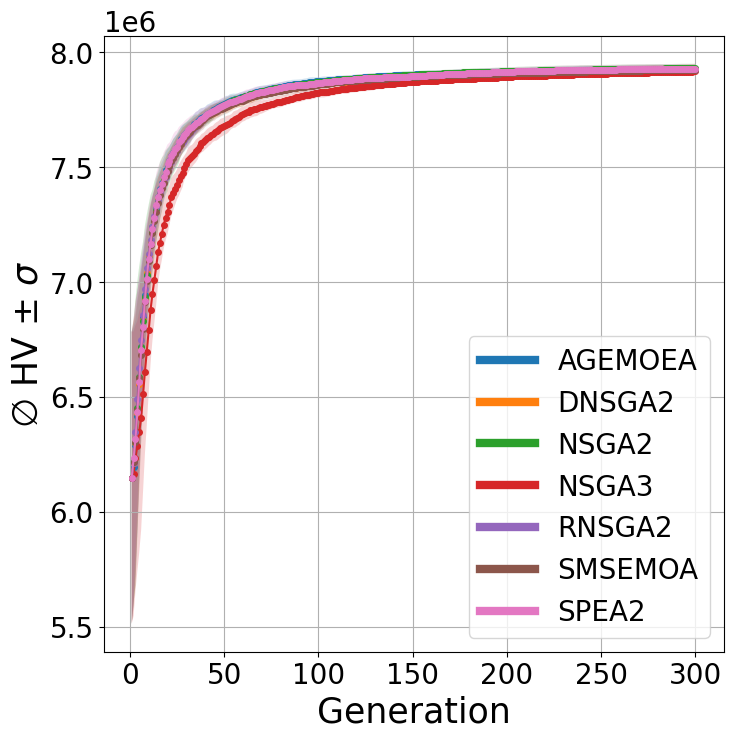

In [4]:
import os
import pandas as pd
import ast
import numpy as np
from pymoo.indicators.hv import Hypervolume
import matplotlib.pyplot as plt

# Define the root folder path
#root_folder = '/Users/carlonue/Documents/Venvs/pathpave_pymoo/log_all_final/gradientMap'
#root_folder = '/Users/carlonue/Documents/Venvs/pathpave_pymoo/log_all_final/meanderingRiverMap'
#root_folder = '/Users/carlonue/Documents/Venvs/pathpave_pymoo/log_all_final/radialGradientMap'
root_folder = '/Users/carlonue/Documents/Venvs/pathpave_pymoo/log_all_final/sinusoidalMap'

#root_folder = '/Users/carlonue/Documents/Venvs/pathpave_pymoo/bugfree S3 shift data/gradientObstacles'  
#root_folder = "/Users/carlonue/Documents/Venvs/pathpave_pymoo/bugfree S3 shift data/sinusoidalObstacles"
                                                                                                        #<--------------------------------- ROOT FOLDER ---------------------------------

ref_point_gradient_map = (3329.7000000000003, 3059.463)
ref_point_river_map = (3369.3, 4263.996254441) #Ref_point = (3369.3, 4261.344628519)
ref_point_radial_gradient_map = (3483.7000000000003, 2492.8322626350005)
ref_point_sinusoidal_map = (3329.7000000000003, 2459.370938244)

# Consolidate all desired algorithm names
algorithms = [
    #"_AGEMOEA_0", "_DNSGA2_0",  "_NSGA2_0", "_NSGA3_0", "_RNSGA2_0", "_SMSEMOA_0", "_SPEA2_0"#,
    #"_AGEMOEA_1",  "_DNSGA2_1",  "_NSGA2_1", "_NSGA3_1", "_RNSGA2_1", "_SMSEMOA_1", "_SPEA2_1",
    #"_AGEMOEA_2",  "_DNSGA2_2",  "_NSGA2_2", "_NSGA3_2", "_RNSGA2_2", "_SMSEMOA_2", "_SPEA2_2"#,
    #"_AGEMOEA_3",  "_DNSGA2_3",  "_NSGA2_3", "_NSGA3_3", "_RNSGA2_3", "_SMSEMOA_3", "_SPEA2_3"#,
    #"_AGEMOEA_4",  "_DNSGA2_4",  "_NSGA2_4", "_NSGA3_4", "_RNSGA2_4", "_SMSEMOA_4", "_SPEA2_4"#,
    "_AGEMOEA_5",  "_DNSGA2_5",  "_NSGA2_5", "_NSGA3_5", "_RNSGA2_5", "_SMSEMOA_5", "_SPEA2_5"#,

    # These are the ones with a worse initial HV
    #"_CTAEA_0", "_CTAEA_1", "_CTAEA_2", "_CTAEA_3", "_CTAEA_4", 
    #"_MOEAD_0", "_MOEAD_1", "_MOEAD_2", "_MOEAD_3", "_MOEAD_4"
]

# Dictionary to store HV values per generation for each algorithm
hv_dict = {algo: ([], []) for algo in algorithms}

# Process each algorithm
for algo in algorithms:
    print(f"Processing {algo.strip('_')}...")
    
    # Initialize lists to store HV values per generation across all files for the current algorithm
    hv_per_generation = []
    
    # Create a Hypervolume indicator instance with the reference point
    hv_indicator = Hypervolume(ref_point=ref_point_sinusoidal_map)                                            #<--------------------------------- REF POINT ---------------------------------
    
    # Iterate through all subfolders
    for subdir, _, files in os.walk(root_folder):
        if algo in os.path.basename(subdir):  # Exact match check
            for file in files:
                if file == 'optLog.csv':
                    file_path = os.path.join(subdir, file)
                    try:
                        df = pd.read_csv(file_path, nrows=300)
                    except Exception as e:
                        print(f"Error reading {file_path}: {e}")
                        continue
                    
                    hv_values = []
                    for index, row in df.iterrows():
                        try:
                            objective_values_str = row[' objectiveValues']
                            objective_values_list = ast.literal_eval(objective_values_str)
                            objective_values_array = np.array(objective_values_list)
                            hv_value = hv_indicator(objective_values_array)
                            hv_values.append(hv_value)
                        except Exception as e:
                            print(f"Error processing row {index} in {file_path}: {e}")
                            continue
                    
                    if hv_values:
                        hv_per_generation.append(hv_values)
    
    if hv_per_generation:
        max_length = max(len(hv) for hv in hv_per_generation)
        padded_hv_per_generation = [hv + [np.nan] * (max_length - len(hv)) for hv in hv_per_generation]
        hv_per_generation = np.array(padded_hv_per_generation)
        average_hv_per_generation = np.nanmean(hv_per_generation, axis=0)
        std_hv_per_generation = np.nanstd(hv_per_generation, axis=0)
        hv_dict[algo] = (average_hv_per_generation, std_hv_per_generation)

# Plotting
plt.figure(figsize=(8, 8))
for algo, (average_hv, std_hv) in hv_dict.items():
    if len(average_hv) > 0:
        plt.plot(range(1, len(average_hv) + 1), average_hv, marker='o', markersize=4, label=f'{algo[:-2].strip("_")}')
        plt.fill_between(range(1, len(average_hv) + 1), average_hv - std_hv, average_hv + std_hv, alpha=0.2)

plt.xlabel('Generation', fontsize=25)
plt.ylabel(r'$\varnothing$ HV $\pm$ $\sigma$', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax = plt.gca()
ax.yaxis.get_offset_text().set_fontsize(20)
#plt.title('Hypervolume Over Generations for Different Algorithms')
legend = plt.legend(fontsize=20)
for line in legend.get_lines():
    line.set_linewidth(6)

plt.grid(True)
plt.show()